In [20]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import statsmodels.api as sm

from utils.utils import bar_chart, cat_map, chor_map

#setting the display options for Pandas to ensure we see all the fields in our dataset
pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
dc_nbrhds_geo = gpd.read_file('data/dcgis/Neighborhood_Clusters.geojson')
abnb_dc_geo = gpd.read_file('data/abnb_dc_listing_geo.json')

In [3]:
abnb_dc_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      6671 non-null   int64   
 1   neighbourhood_cleansed  6671 non-null   object  
 2   latitude                6671 non-null   float64 
 3   longitude               6671 non-null   float64 
 4   property_type           6671 non-null   object  
 5   room_type               6671 non-null   object  
 6   accommodates            6671 non-null   int64   
 7   bathrooms               6671 non-null   float64 
 8   bedrooms                6671 non-null   float64 
 9   beds                    6671 non-null   float64 
 10  price                   6671 non-null   float64 
 11  minimum_nights          6671 non-null   int64   
 12  maximum_nights          6671 non-null   int64   
 13  number_of_reviews       6671 non-null   int64   
 14  index_right     

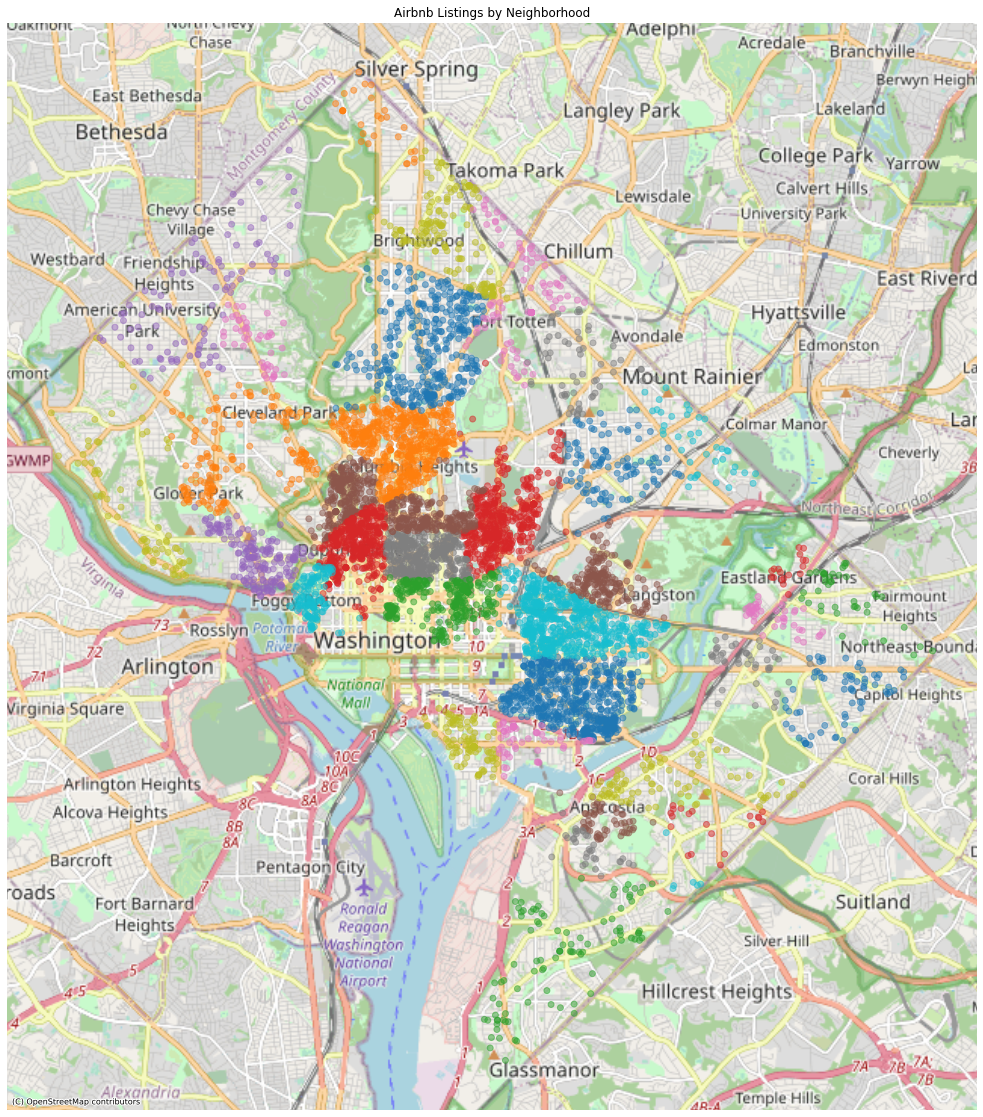

In [4]:
cat_map(abnb_dc_geo,'NBH_NAMES','Airbnb Listings by Neighborhood')

In [5]:
abnb_dc_geo_mean_prc_nbrhood = abnb_dc_geo.groupby("NBH_NAMES")["price"].mean()
dc_nbrhds_geo_MEAN_PRC_NBRHD = dc_nbrhds_geo.merge(abnb_dc_geo_mean_prc_nbrhood, on="NBH_NAMES")

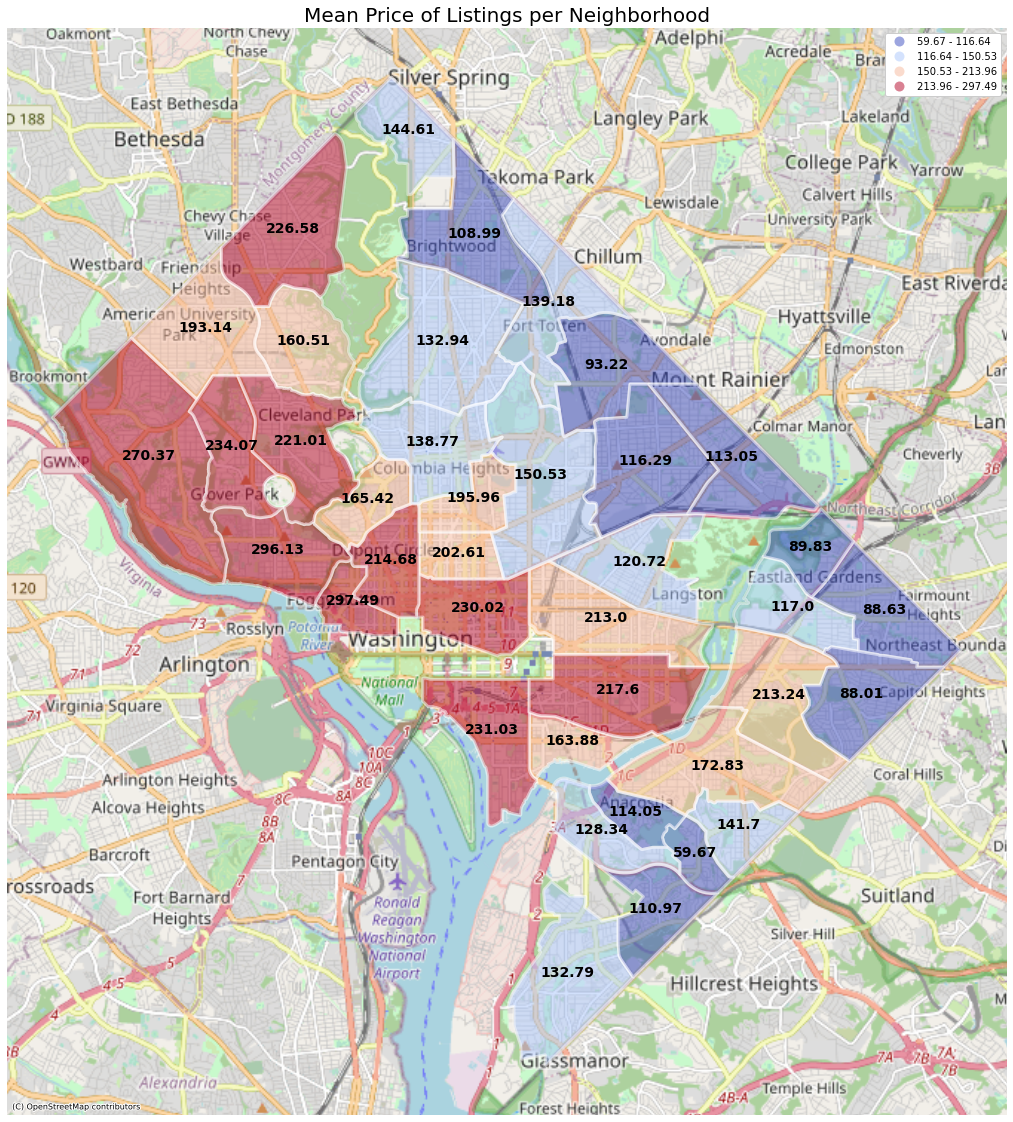

In [6]:
chor_map(gdf=dc_nbrhds_geo_MEAN_PRC_NBRHD, column='price', title='Mean Price of Listings per Neighborhood')

In [7]:
abnb_dc_geo_num_lstng_nbrhd = abnb_dc_geo.groupby('NBH_NAMES')['id'].count()
dc_nbrhds_geo_NUM_LSTNG_NBRHD = dc_nbrhds_geo.merge(abnb_dc_geo_num_lstng_nbrhd, on="NBH_NAMES")

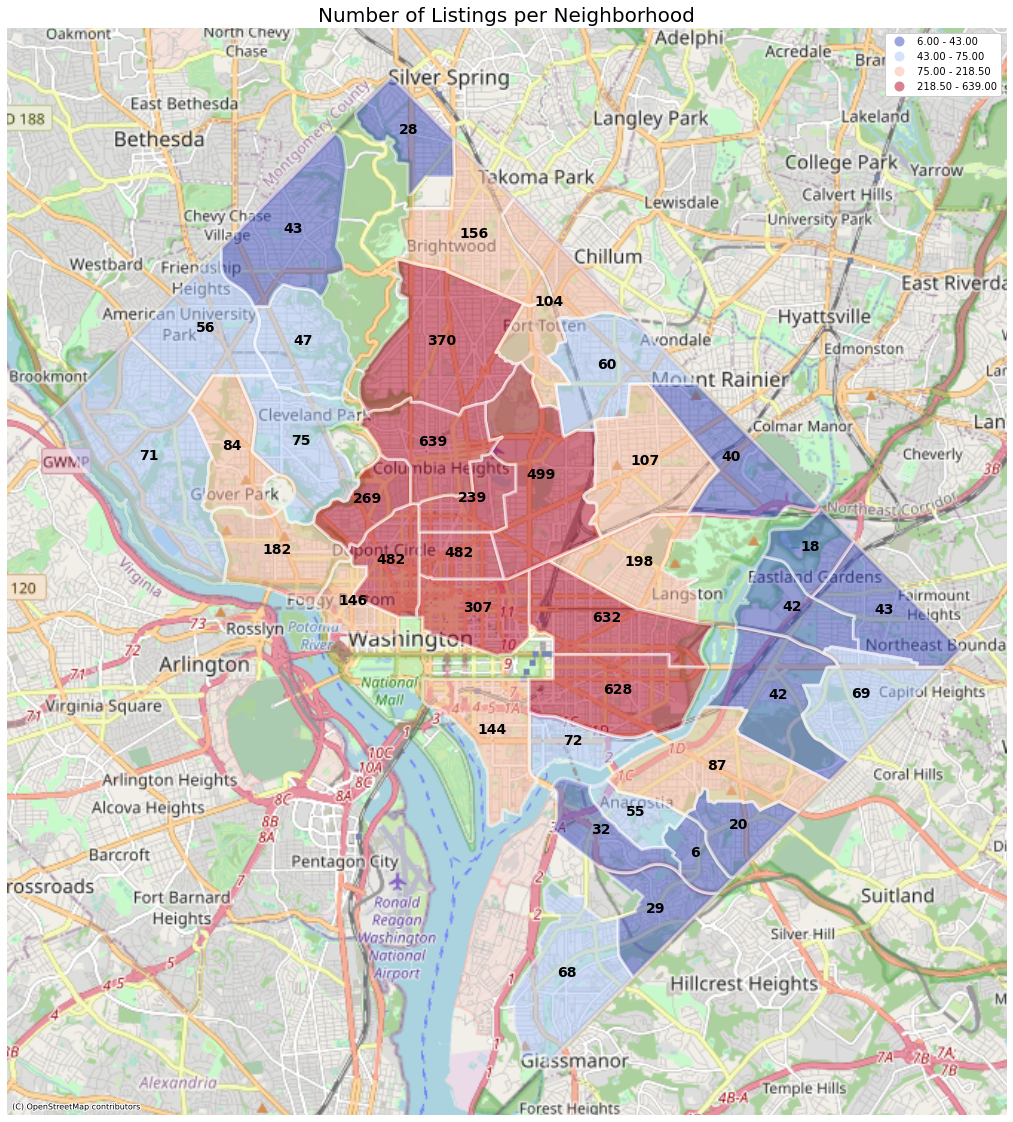

In [8]:
chor_map(gdf=dc_nbrhds_geo_NUM_LSTNG_NBRHD, column='id', title='Number of Listings per Neighborhood')

In [22]:
# X = abnb_dc_geo[[ 'neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms','beds','minimum_nights','maximum_nights','number_of_reviews']]
X = abnb_dc_geo[['room_type','accommodates','bathrooms','bedrooms','beds','number_of_reviews']]
X = pd.get_dummies(data=X, drop_first=True)
y = abnb_dc_geo[['price']]

In [23]:
X.head()

accommodates  bathrooms  bedrooms  beds  number_of_reviews  \
0             1        1.0       1.0   1.0                 73   
1             2        1.0       1.0   1.0                 38   
2             2        2.0       1.0   1.0                103   
3             2        1.0       1.0   1.0                 11   
4             1        1.0       1.0   1.0                 36   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  
0                     0                       1                      0  
1                     0                       1                      0  
2                     0                       1                      0  
3                     0                       1                      0  
4                     0                       1                      0

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (4669, 8)
X test shape: (2002, 8)
y train shape: (4669, 1)
y test shape: (2002, 1)


/Users/njackson/anaconda3/envs/dsnd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


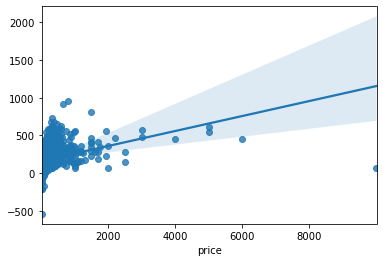

In [26]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
sns.regplot(y_test,predictions);

In [27]:
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     94.70
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          2.16e-146
Time:                        13:34:54   Log-Likelihood:                -33112.
No. Observations:                4669   AIC:                         6.624e+04
Df Residuals:                    4660   BIC:                         6.630e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

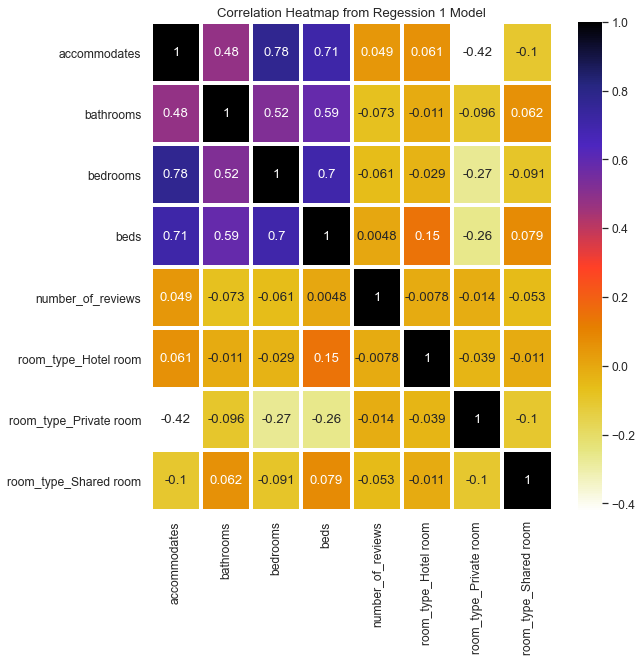

In [32]:
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(9,9))# Sample figsize in inches
# ax.set_xlabel()
ax.set_title("Correlation Heatmap from Regession 1 Model")
sns.heatmap(X.corr(),annot=True,lw=3,cmap="CMRmap_r", fmt='.2g', ax=ax)
fig.savefig("x2_corr_heatmap.png",bbox_inches='tight')

In [34]:
X1 = abnb_dc_geo[[ 'room_type','bedrooms','number_of_reviews']]
X1 = pd.get_dummies(data=X1, drop_first=True)
y1 = abnb_dc_geo[['price']]

In [35]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=101)

In [36]:
print(f"X train shape: {X1_train.shape}")
print(f"X test shape: {X1_test.shape}")
print(f"y train shape: {y1_train.shape}")
print(f"y test shape: {y1_test.shape}")

X train shape: (5336, 5)
X test shape: (1335, 5)
y train shape: (5336, 1)
y test shape: (1335, 1)


In [38]:
model = LinearRegression()
model.fit(X1_train,y1_train)
predictions = model.predict(X1_test)

/Users/njackson/anaconda3/envs/dsnd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


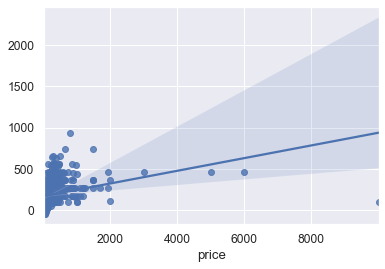

In [39]:
sns.regplot(y1_test,predictions);

In [40]:
X1_train_Sm= sm.add_constant(X1_train)
X1_train_Sm= sm.add_constant(X1_train)
ls=sm.OLS(y1_train,X1_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     141.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          3.06e-141
Time:                        13:51:00   Log-Likelihood:                -38033.
No. Observations:                5336   AIC:                         7.608e+04
Df Residuals:                    5330   BIC:                         7.612e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     72

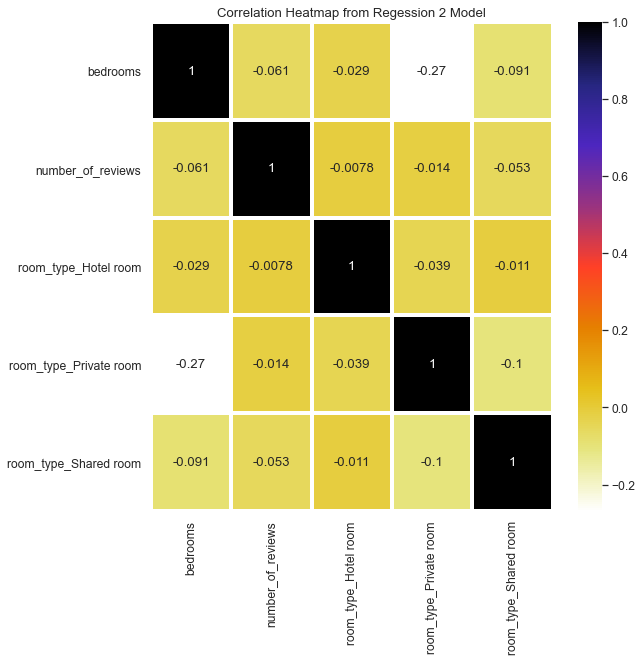

In [41]:
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(9,9))# Sample figsize in inches
# ax.set_xlabel()
ax.set_title("Correlation Heatmap from Regession 2 Model")
sns.heatmap(X1.corr(),annot=True,lw=3,cmap="CMRmap_r", fmt='.2g', ax=ax)
fig.savefig("x4_corr_heatmap.png",bbox_inches='tight')